In [1]:
import pandas as pd
import sklearn as sk

from sklearn import model_selection
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Загружаем данные и знакомимься с ними
col_names = ['pregnant', 
             'glucose', 
             'bp', 
             'skin',
             'insulin', 
             'bmi', 
             'pedigree', 
             'age', 
             'label'
]

pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Выделяем целевую переменную
Y = pima.label
X = pima.drop(['label'], axis=1)

In [4]:
#Поделим данные
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, 
                                                                       test_size = 0.2, 
                                                                       random_state=True)

In [5]:
#Создадим модель
cls = linear_model.LogisticRegression(max_iter=1000)

In [6]:
#Обучим модель
cls.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
#Применем модель к тестовой выборке
y_pred = cls.predict(x_test)

Text(0.5, 15.0, 'Предсказанные значения')

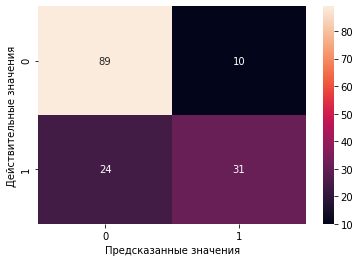

In [8]:
# Красиво выведем результат
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(sk.metrics.confusion_matrix(y_test, y_pred)),
            annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [9]:
#Метрика достоверности
sk.metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [10]:
#Метрика точности
sk.metrics.precision_score(y_test, y_pred, pos_label='1')

0.7560975609756098

In [11]:
#Метрика полноты
sk.metrics.recall_score(y_test, y_pred, pos_label='1')

0.5636363636363636

Модель на мой взгляд совсем неприменяемая, потому что почти процент ложных предсказаний крайне высок для задачи, связанной с установкой диагноза